# Rental Bikes Demand Prediction

# Loading Dataset and Importing Modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

In [3]:
import warnings
warnings.filterwarnings('ignore')


# Import the datset

In [4]:
rental = pd.read_csv("Rental_Bike_Prediction.csv",encoding='latin')

In [5]:
rental

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [6]:
#for displaying the top ten rows in dataset
rental.head(10)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,01/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


In [7]:
#for displaying the bottom ten rows in dataset
rental.tail(10)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8750,30/11/2018,761,14,7.8,20,2.2,2000,-13.8,1.67,0.0,0.0,Autumn,No Holiday,Yes
8751,30/11/2018,768,15,7.0,20,3.3,1994,-14.4,1.21,0.0,0.0,Autumn,No Holiday,Yes
8752,30/11/2018,837,16,7.2,23,1.5,1945,-12.6,0.72,0.0,0.0,Autumn,No Holiday,Yes
8753,30/11/2018,1047,17,6.0,29,2.1,1877,-10.7,0.23,0.0,0.0,Autumn,No Holiday,Yes
8754,30/11/2018,1384,18,4.7,34,1.9,1661,-9.8,0.00,0.0,0.0,Autumn,No Holiday,Yes
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.00,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.00,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.00,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.00,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.00,0.0,0.0,Autumn,No Holiday,Yes


In [8]:
#statistical detail of dataset
rental.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


In [9]:
#shape of the dataset
rental.shape

(8760, 14)

In [10]:
#shows the columns of dataset
rental.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [11]:
#information of the dataset
rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [12]:
#shows the no of unique values in each column of dataset
rental.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [13]:
#gives the null values
rental.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

# Description of dataset 

# Breakdown of Our Features:

Date : The date of the day, during 365 days from 01/12/2017 to 30/11/2018, formating in DD/MM/YYYY, type : str, we need to convert into datetime format.

Rented Bike Count : Number of rented bikes per hour which our dependent variable and we need to predict that, type : int

Hour: The hour of the day, starting from 0-23 it's in a digital time format, type : int, we need to convert it into category data type.

Temperature(°C): Temperature in Celsius, type : Float

Humidity(%): Humidity in the air in %, type : int

Wind speed (m/s) : Speed of the wind in m/s, type : Float

Visibility (10m): Visibility in m, type : int

Dew point temperature(°C): Temperature at the beggining of the day, type : Float

Solar Radiation (MJ/m2): Sun contribution, type : Float

Rainfall(mm): Amount of raining in mm, type : Float

Snowfall (cm): Amount of snowing in cm, type : Float

Seasons: *Season of the year, type : str, there are only 4 season's in data *.

Holiday: If the day is holiday period or not, type: str

Functioning Day: If the day is a Functioning Day or not, type : str

In [14]:
#shows the no of duplicated values
rental.duplicated().sum()

0

In [15]:
#changing the column name
rental=rental.rename(columns={'Rented Bike Count':'Rented_Bike_Count',
                                'Temperature(°C)':'Temperature',
                                'Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'Wind_speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'Solar_Radiation',
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Functioning_Day'})

In [16]:
#displays the dataset after updating the columns
rental

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [17]:
# Changing the "Date" column into three (year,month,day) column
rental['Date'] = rental['Date'].apply(lambda x: 
                                    dt.datetime.strptime(x,"%d/%m/%Y"))

In [18]:
rental['year'] = rental['Date'].dt.year
rental['month'] = rental['Date'].dt.month
rental['day'] = rental['Date'].dt.day_name()

In [19]:
#creating a new column of "weekdays_weekend" and drop the column "Date","day","year"
rental['weekdays_weekend']=rental['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
rental=rental.drop(columns=['Date','day','year'],axis=1)

In [20]:
#displays the top 5 row in dataset
rental.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


In [21]:
#updated information of the dataset
rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented_Bike_Count      8760 non-null   int64  
 1   Hour                   8760 non-null   int64  
 2   Temperature            8760 non-null   float64
 3   Humidity               8760 non-null   int64  
 4   Wind_speed             8760 non-null   float64
 5   Visibility             8760 non-null   int64  
 6   Dew_point_temperature  8760 non-null   float64
 7   Solar_Radiation        8760 non-null   float64
 8   Rainfall               8760 non-null   float64
 9   Snowfall               8760 non-null   float64
 10  Seasons                8760 non-null   object 
 11  Holiday                8760 non-null   object 
 12  Functioning_Day        8760 non-null   object 
 13  month                  8760 non-null   int64  
 14  weekdays_weekend       8760 non-null   int64  
dtypes: f

In [22]:
#count of weekdays and weekend
rental['weekdays_weekend'].value_counts()

0    6264
1    2496
Name: weekdays_weekend, dtype: int64

In [23]:
#gives the updated unique values of a column
rental.nunique()

Rented_Bike_Count        2166
Hour                       24
Temperature               546
Humidity                   90
Wind_speed                 65
Visibility               1789
Dew_point_temperature     556
Solar_Radiation           345
Rainfall                   61
Snowfall                   51
Seasons                     4
Holiday                     2
Functioning_Day             2
month                      12
weekdays_weekend            2
dtype: int64

In [24]:
#Change the int64 column into category column
cols=['Hour','month','weekdays_weekend']
for col in cols:
    rental[col]=rental[col].astype('category')

In [25]:
#gives the information of the data type
rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Rented_Bike_Count      8760 non-null   int64   
 1   Hour                   8760 non-null   category
 2   Temperature            8760 non-null   float64 
 3   Humidity               8760 non-null   int64   
 4   Wind_speed             8760 non-null   float64 
 5   Visibility             8760 non-null   int64   
 6   Dew_point_temperature  8760 non-null   float64 
 7   Solar_Radiation        8760 non-null   float64 
 8   Rainfall               8760 non-null   float64 
 9   Snowfall               8760 non-null   float64 
 10  Seasons                8760 non-null   object  
 11  Holiday                8760 non-null   object  
 12  Functioning_Day        8760 non-null   object  
 13  month                  8760 non-null   category
 14  weekdays_weekend       8760 non-null   c

In [26]:
#gives the updated column names
rental.columns

Index(['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day', 'month',
       'weekdays_weekend'],
      dtype='object')

In [27]:
#unique values in (weekdays_weekend) column
rental['weekdays_weekend'].unique()

[0, 1]
Categories (2, int64): [0, 1]

# Month wise Analysis

Text(0.5, 1.0, 'Count of Rented bikes acording to Month ')

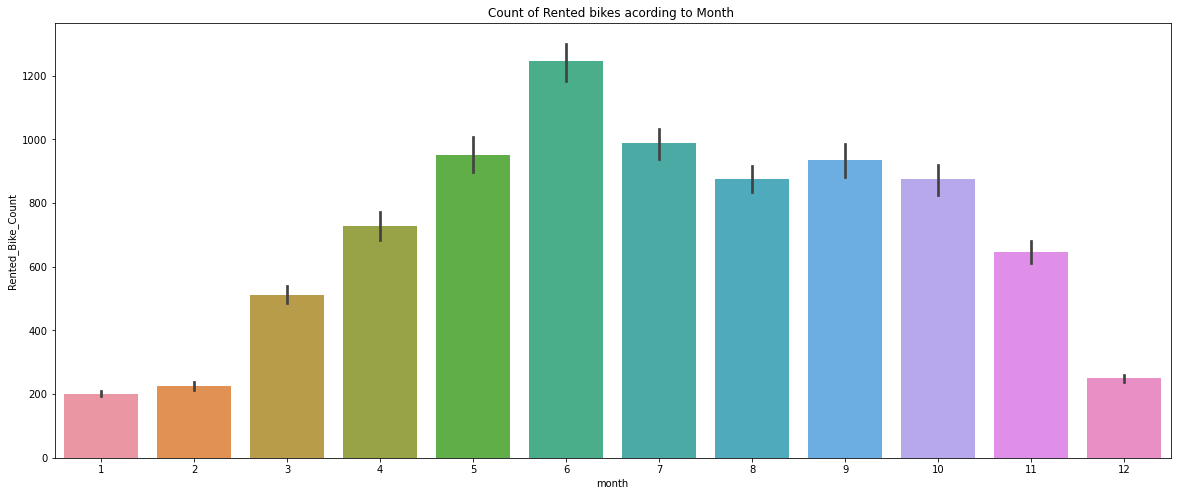

In [28]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=rental,x='month',y='Rented_Bike_Count')
plt.title('Count of Rented bikes acording to Month ')

# weekend wise Analysis

Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays and weekend ')

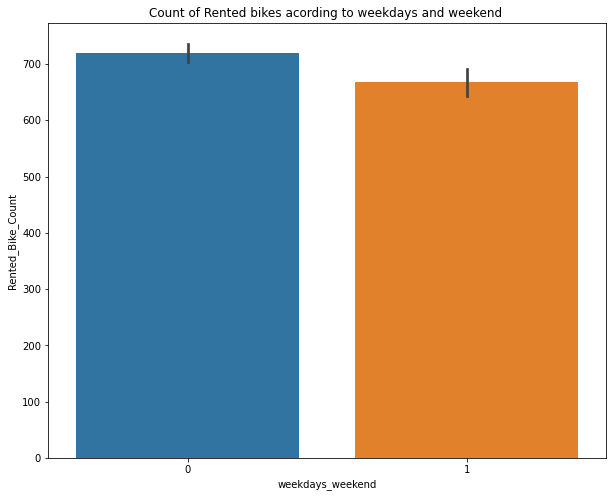

In [29]:
#anlysis of data by vizualisation according to weekend by boxplot
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=rental,x='weekdays_weekend',y='Rented_Bike_Count')
plt.title('Count of Rented bikes acording to weekdays and weekend ')

Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays_weekend ')

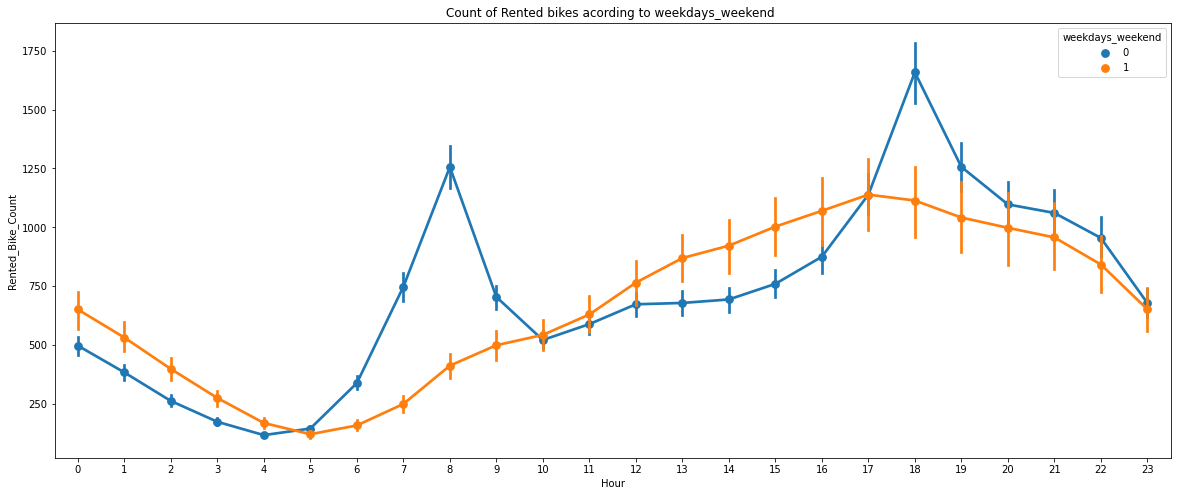

In [30]:
#anlysis of data by vizualisation according to weekend by pointplot
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=rental,x='Hour',y='Rented_Bike_Count',hue='weekdays_weekend')
plt.title('Count of Rented bikes acording to weekdays_weekend ')

# Hour wise Analysis

Text(0.5, 1.0, 'Count of Rented bikes acording to Hour ')

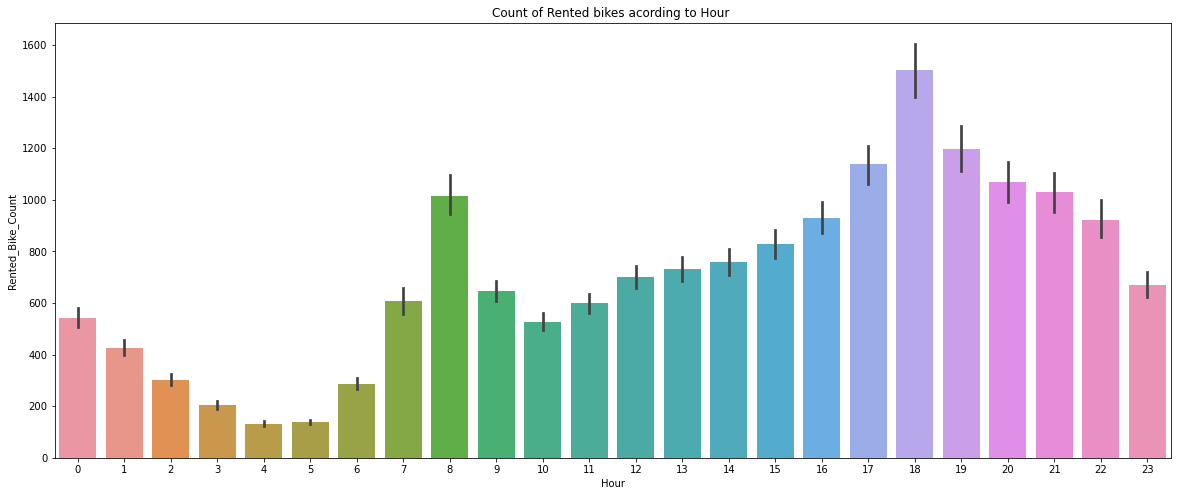

In [31]:
#anlysis of data by vizualisation according to hour by boxplot
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=rental,x='Hour',y='Rented_Bike_Count')
plt.title('Count of Rented bikes acording to Hour ')

# Functioning day wise Analysis

Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')

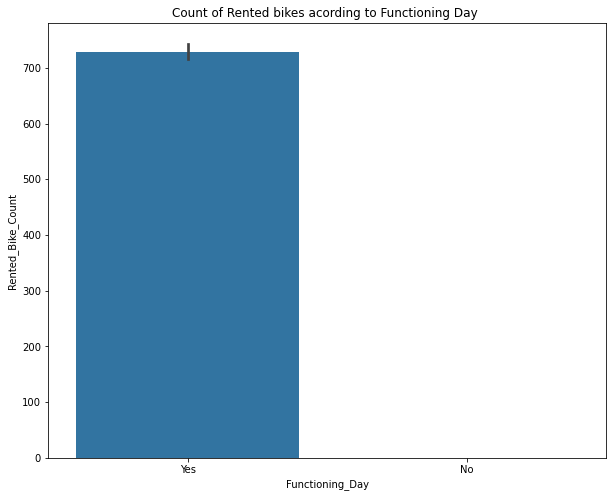

In [32]:
#anlysis of data by vizualisation according to Functioning day by boxplot
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=rental,x='Functioning_Day',y='Rented_Bike_Count')
plt.title('Count of Rented bikes acording to Functioning Day ')

Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')

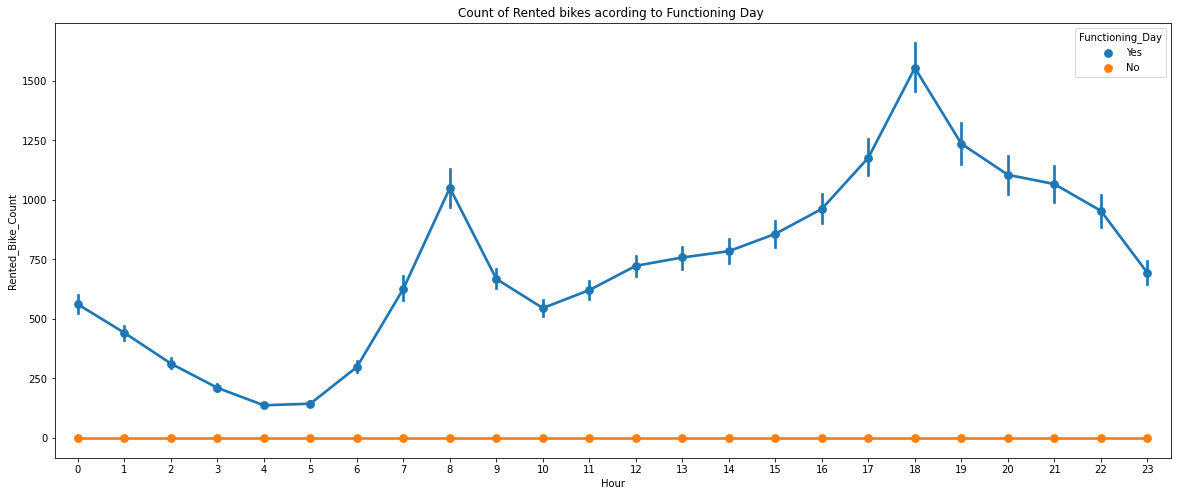

In [33]:
#anlysis of data by vizualisation according to Functioning day by pointplot
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=rental,x='Hour',y='Rented_Bike_Count',hue='Functioning_Day')
plt.title('Count of Rented bikes acording to Functioning Day ')

# Season wise Analysis

Text(0.5, 1.0, 'Count of Rented bikes acording to Seasons ')

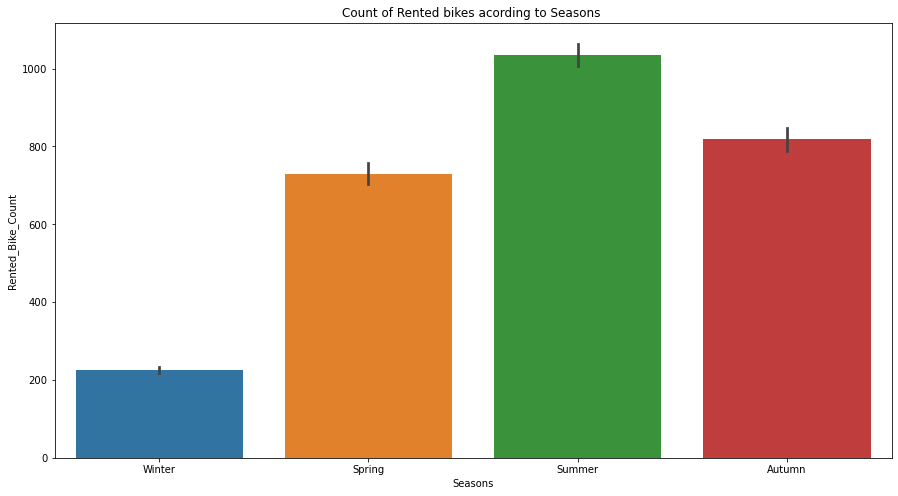

In [34]:
#anlysis of data by vizualisation according to seasons by boxplot
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=rental,x='Seasons',y='Rented_Bike_Count')
plt.title('Count of Rented bikes acording to Seasons ')

Text(0.5, 1.0, 'Count of Rented bikes acording to seasons ')

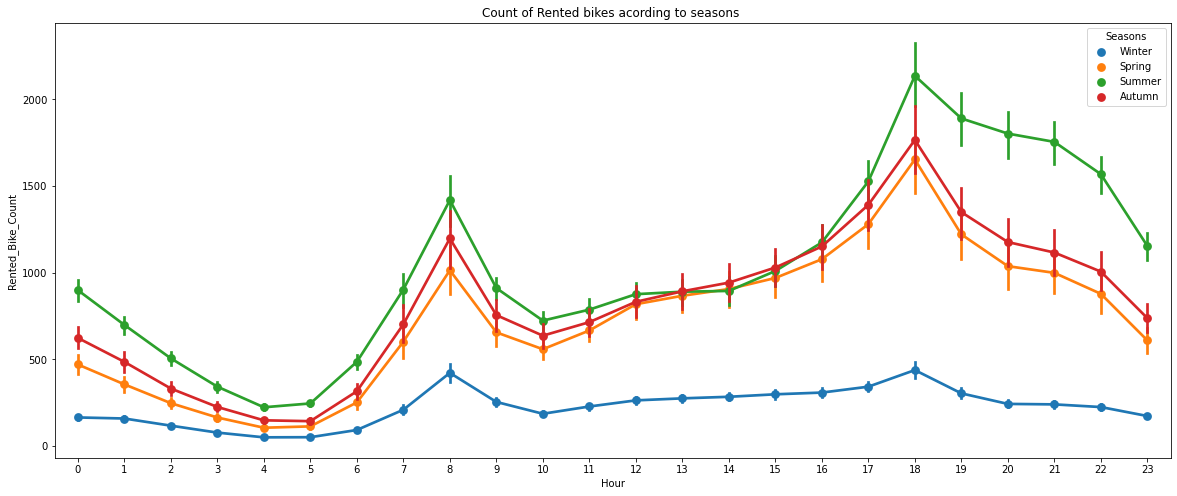

In [35]:
#anlysis of data by vizualisation according to seasons by pointplot
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=rental,x='Hour',y='Rented_Bike_Count',hue='Seasons')
plt.title('Count of Rented bikes acording to seasons ')


# Holiday wise Analysis

Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday ')

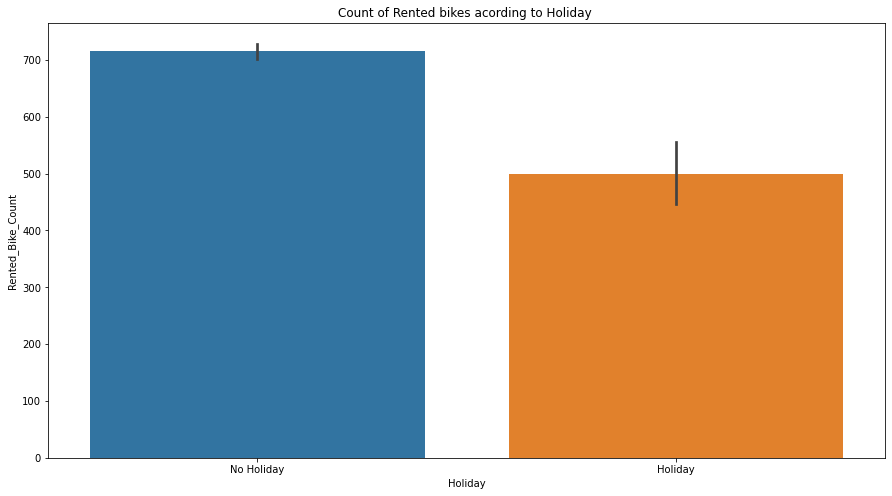

In [36]:
#anlysis of data by vizualisation according to holiday by boxplot
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=rental,x='Holiday',y='Rented_Bike_Count')
plt.title('Count of Rented bikes acording to Holiday ')

Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday ')

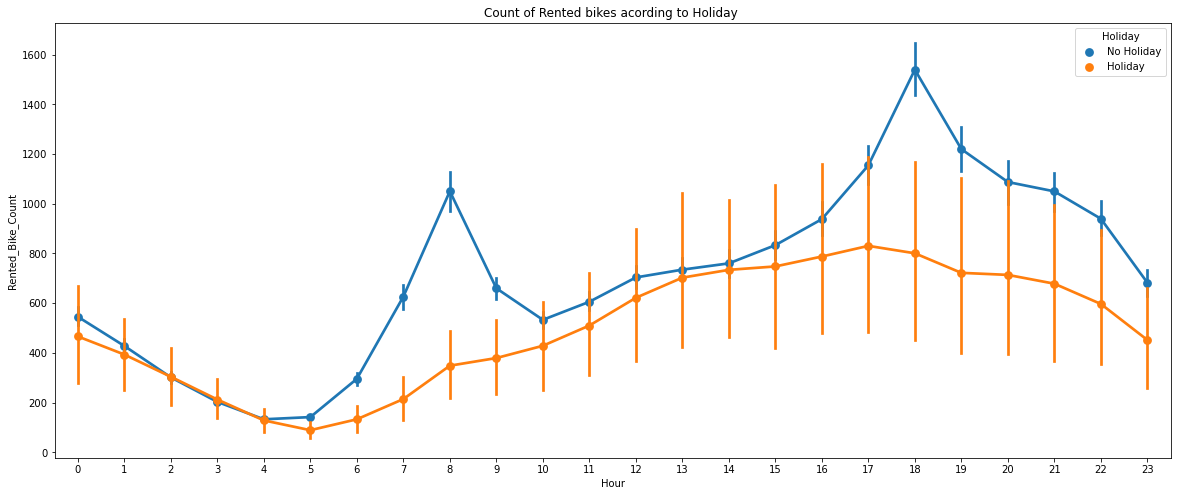

In [37]:
#anlysis of data by vizualisation according to holiday by pointplot
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=rental,x='Hour',y='Rented_Bike_Count',hue='Holiday')
plt.title('Count of Rented bikes acording to Holiday ')

# Analysis of Numerical variables distplots

In [38]:
#assign the numerical coulmn to variables
numerical_columns=list(rental.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall'],
      dtype='object')

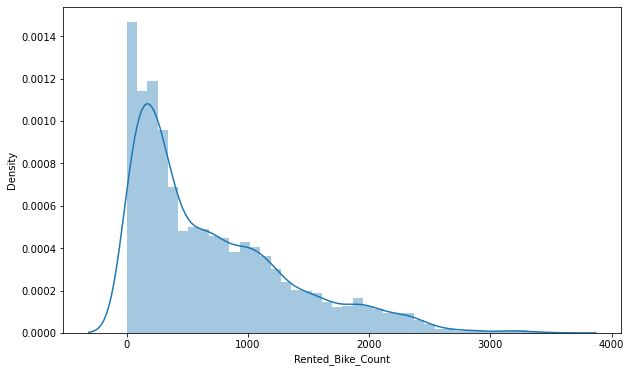

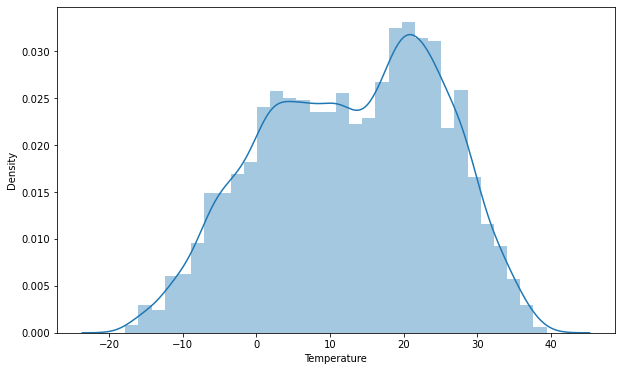

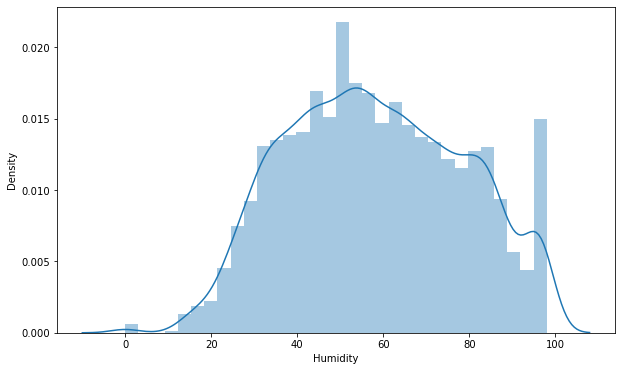

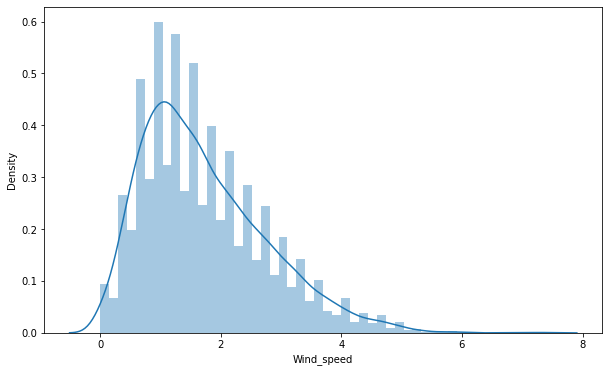

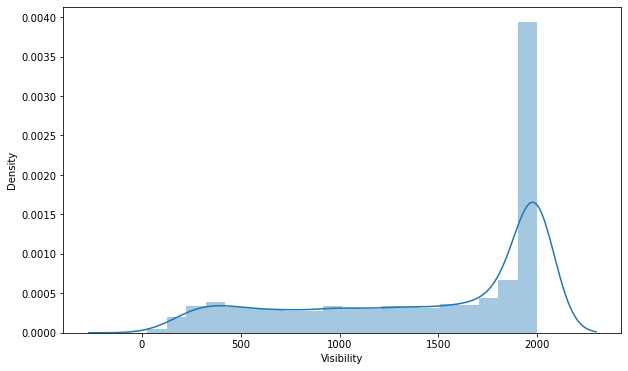

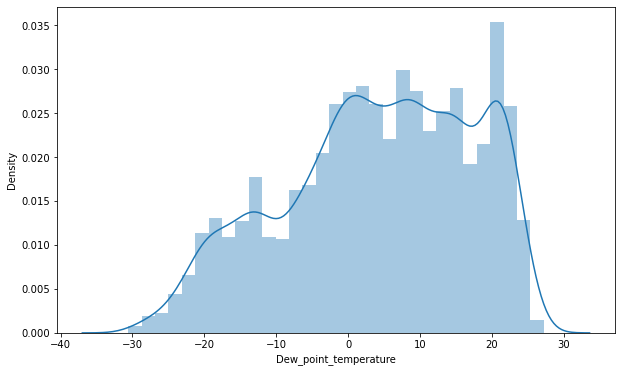

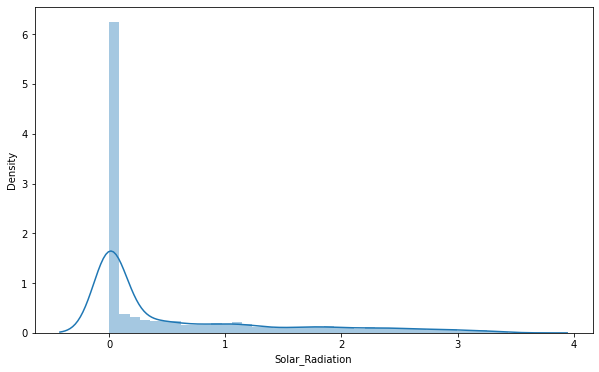

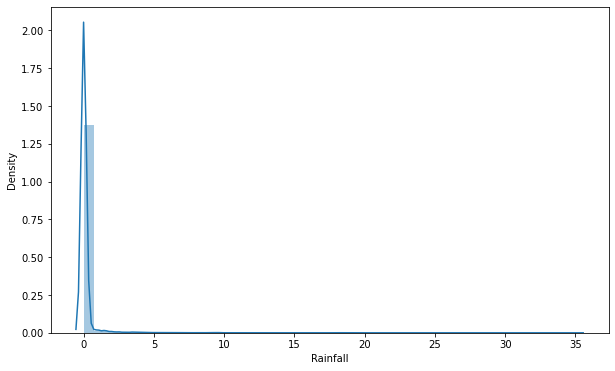

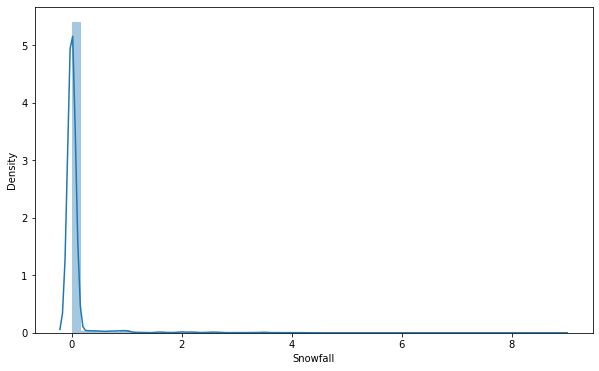

In [39]:
#printing displots to analyze the distribution of all numerical features
for col in numerical_features:
    plt.figure(figsize=(10,6))
    sns.distplot(x=rental[col])
    plt.xlabel(col)
plt.show()

# Numerical vs.Rented_Bike_Count

<AxesSubplot:xlabel='Temperature'>

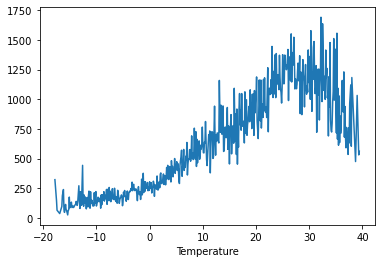

In [40]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Temperature" 
rental.groupby('Temperature').mean()['Rented_Bike_Count'].plot()

<AxesSubplot:xlabel='Dew_point_temperature'>

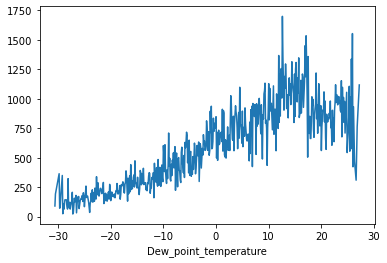

In [41]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Dew_point_temperature" 
rental.groupby('Dew_point_temperature').mean()['Rented_Bike_Count'].plot()

<AxesSubplot:xlabel='Solar_Radiation'>

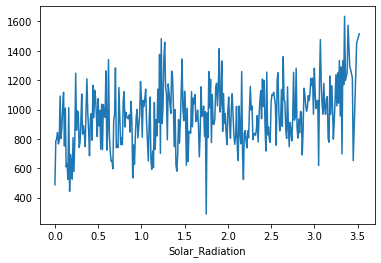

In [42]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Solar_Radiation" 
rental.groupby('Solar_Radiation').mean()['Rented_Bike_Count'].plot()

<AxesSubplot:xlabel='Snowfall'>

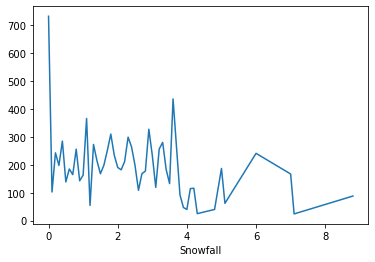

In [43]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Snowfall" 
rental.groupby('Snowfall').mean()['Rented_Bike_Count'].plot()


<AxesSubplot:xlabel='Rainfall'>

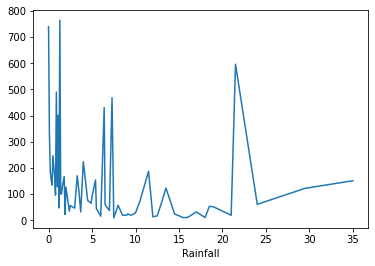

In [44]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Rainfall" 
rental.groupby('Rainfall').mean()['Rented_Bike_Count'].plot()


<AxesSubplot:xlabel='Wind_speed'>

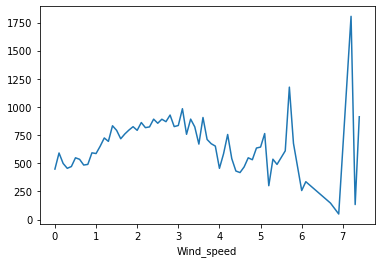

In [45]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Wind_speed" 
rental.groupby('Wind_speed').mean()['Rented_Bike_Count'].plot()

# Checking of outliers 

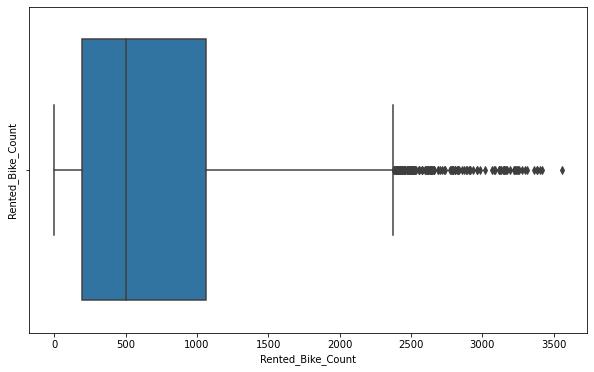

In [46]:
#Boxplot of Rented Bike Count to check outliers
plt.figure(figsize=(10,6))
plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=rental['Rented_Bike_Count'])
plt.show()

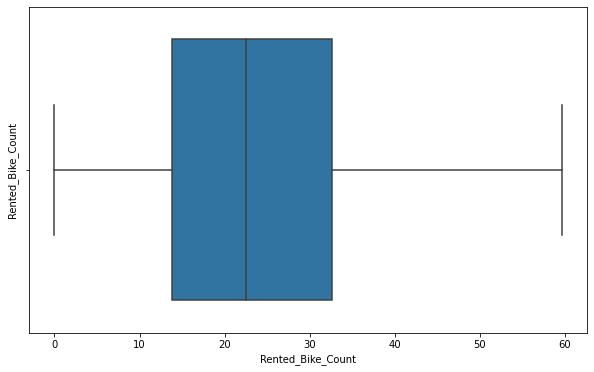

In [47]:
#After applying sqrt on Rented Bike Count check wheater we still have outliers 
plt.figure(figsize=(10,6))
plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=np.sqrt(rental['Rented_Bike_Count']))
plt.show()

# Correlation of data after clearing the outliers

In [48]:
rental.corr()

,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
Rented_Bike_Count,1.000000,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Temperature,0.538558,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity,-0.199780,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind_speed,0.121108,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility,0.199280,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew_point_temperature,0.379788,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar_Radiation,0.261837,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall,-0.123074,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall,-0.141804,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


# Checking in Ordinary Least Squares regression (OLS) Model

Ordinary least squares (OLS) regression is a statistical method of analysis that estimates the relationship between one or more independent variables and a dependent variable

In [49]:
#import the module
#assign the 'x','y' value
import statsmodels.api as sm
X = rental[[ 'Temperature','Humidity',
       'Wind_speed', 'Visibility','Dew_point_temperature',
       'Solar_Radiation', 'Rainfall', 'Snowfall']]
Y = rental['Rented_Bike_Count']

In [50]:
#displays the top 5 rows in the data
rental.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


In [51]:
#add a constant to the column
X = sm.add_constant(X)
X

,const,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
0,1.0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,1.0,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,1.0,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,1.0,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,1.0,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
8755,1.0,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0
8756,1.0,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0
8757,1.0,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0
8758,1.0,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0


# fitting an Ordinary least squares (OLS) model 

In [52]:
model= sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented_Bike_Count   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     723.1
Date:                Wed, 27 Jul 2022   Prob (F-statistic):               0.00
Time:                        14:45:05   Log-Likelihood:                -66877.
No. Observations:                8760   AIC:                         1.338e+05
Df Residuals:                    8751   BIC:                         1.338e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   844.6495    106.296      7.946      0.000     636.285    1053.014
Temperature              36.5270      4.169      8.762      0.000      28.355      44.699
Humidity                -10.5077      1.184     -8.872      0.000     -12.829      -8.186
Wind_speed               52.4810      5.661      9.271      0.000      41.385      63.577
Visibility               -0.0097      0.011     -0.886      0.376      -0.031       0.012
Dew_point_temperature    -0.7829      4.402     -0.178      0.859      -9.411       7.846
Solar_Radiation        -118.9772      8.670    -13.724      0.000    -135.971    -101.983
Rainfall                -50.7083      4.932    -10.282      0.000     -60.376     -41.041
Snowfall                 41.0307     12.806      3.204      0.001      15.929      66.133
==============================================================================
Omnibus:                      957.371   Durbin-Watson:                   0.338
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1591.019
Skew:                           0.769   Prob(JB):                         0.00
Kurtosis:                       4.412   Cond. No.                     3.11e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Finding the correlation of splitted data stored in x

In [53]:
X.corr()

,const,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,NaN,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity,NaN,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind_speed,NaN,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility,NaN,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew_point_temperature,NaN,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar_Radiation,NaN,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall,NaN,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall,NaN,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


# Heatmap

visualizing the strength of correlation among variables.

<AxesSubplot:>

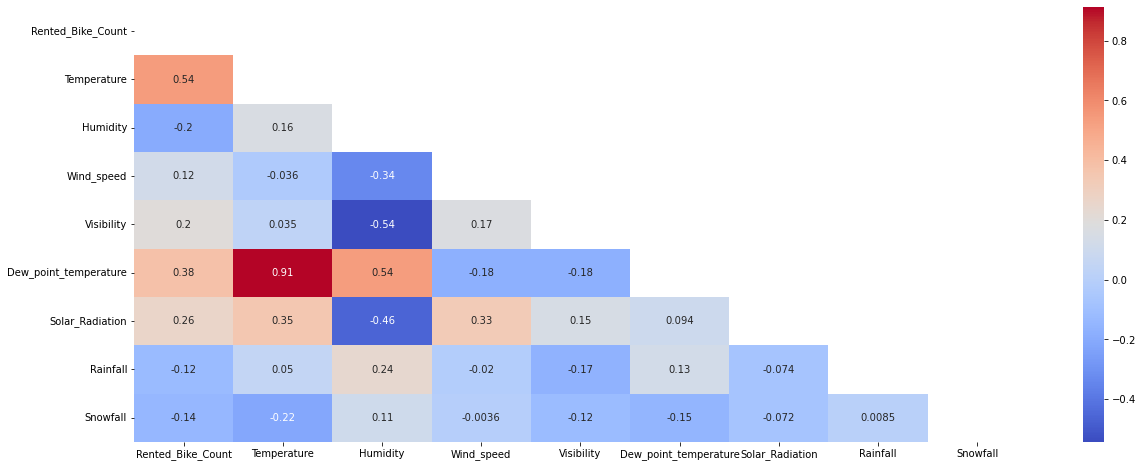

In [54]:
#plotting the Correlation matrix
plt.figure(figsize=(20,8))
correlation=rental.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap((correlation),mask=mask, annot=True,cmap='coolwarm')

In [55]:
#drop the Dew point temperature column
rental=rental.drop(['Dew_point_temperature'],axis=1)

In [56]:
#after dropping the Dew point temperature column checking the information of the data
rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Rented_Bike_Count  8760 non-null   int64   
 1   Hour               8760 non-null   category
 2   Temperature        8760 non-null   float64 
 3   Humidity           8760 non-null   int64   
 4   Wind_speed         8760 non-null   float64 
 5   Visibility         8760 non-null   int64   
 6   Solar_Radiation    8760 non-null   float64 
 7   Rainfall           8760 non-null   float64 
 8   Snowfall           8760 non-null   float64 
 9   Seasons            8760 non-null   object  
 10  Holiday            8760 non-null   object  
 11  Functioning_Day    8760 non-null   object  
 12  month              8760 non-null   category
 13  weekdays_weekend   8760 non-null   category
dtypes: category(3), float64(5), int64(3), object(3)
memory usage: 779.8+ KB


# Creating the dummies for variables which are in object and categorical values

In [57]:
#Assign all catagoriacal features to a variable
categorical_features=list(rental.select_dtypes(['object','category']).columns)
categorical_features=pd.Index(categorical_features)
categorical_features

Index(['Hour', 'Seasons', 'Holiday', 'Functioning_Day', 'month',
       'weekdays_weekend'],
      dtype='object')

# One hot encoding

In [58]:
#create a copy
rental_copy = rental

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

for col in categorical_features:
    rental_copy = one_hot_encoding(rental_copy, col)    

In [59]:
rental_copy.head()   

,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Hour_1,Hour_2,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekdays_weekend_1
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0


# Splitting the dataset for Train & Test for regression

In [60]:
#Assign the value in X and Y
X = rental_copy.drop(columns=['Rented_Bike_Count'], axis=1)
y = np.sqrt(rental_copy['Rented_Bike_Count'])

In [61]:
#displays the top 10 rows of the x dataset
X.head(10)

,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Hour_1,Hour_2,Hour_3,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekdays_weekend_1
0,-5.2,37,2.2,2000,0.00,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,-5.5,38,0.8,2000,0.00,0.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,-6.0,39,1.0,2000,0.00,0.0,0.0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,-6.2,40,0.9,2000,0.00,0.0,0.0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,-6.0,36,2.3,2000,0.00,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,-6.4,37,1.5,2000,0.00,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,-6.6,35,1.3,2000,0.00,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,-7.4,38,0.9,2000,0.00,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,-7.6,37,1.1,2000,0.01,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9,-6.5,27,0.5,1928,0.23,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [62]:
#displays the top 5 values in the y dataset
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented_Bike_Count, dtype: float64

In [63]:
#Create test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

In [64]:
#displays the shape of train and test data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6570, 47)
(2190, 47)
(6570,)
(2190,)


In [65]:
#displays the columns
rental_copy.columns

Index(['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Solar_Radiation', 'Rainfall', 'Snowfall', 'Hour_1',
       'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8',
       'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14',
       'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20',
       'Hour_21', 'Hour_22', 'Hour_23', 'Seasons_Spring', 'Seasons_Summer',
       'Seasons_Winter', 'Holiday_No Holiday', 'Functioning_Day_Yes',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'weekdays_weekend_1'],
      dtype='object')

In [66]:
#gives the statistical description of the data
rental_copy.describe()

,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Hour_1,Hour_2,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekdays_weekend_1
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,...,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,12.882922,58.226256,1.724909,1436.825799,0.569111,0.148687,0.075068,0.041667,0.041667,...,0.082192,0.084932,0.082192,0.084932,0.084932,0.082192,0.084932,0.082192,0.084932,0.284932
std,644.997468,11.944825,20.362413,1.036300,608.298712,0.868746,1.128193,0.436746,0.199838,0.199838,...,0.274672,0.278796,0.274672,0.278796,0.278796,0.274672,0.278796,0.274672,0.278796,0.451408
min,0.000000,-17.800000,0.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,191.000000,3.500000,42.000000,0.900000,940.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,504.500000,13.700000,57.000000,1.500000,1698.000000,0.010000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1065.250000,22.500000,74.000000,2.300000,2000.000000,0.930000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,3556.000000,39.400000,98.000000,7.400000,2000.000000,3.520000,35.000000,8.800000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# LINEAR REGRESSION

Regression models a target prediction value based on independent variables. It is mostly used for finding out the relationship between variables and forecasting

In [67]:
#importing the package
from sklearn.linear_model import LinearRegression

In [68]:
#fitting the model
lr_model= LinearRegression().fit(X_train, y_train)

In [69]:
#calculating the model score
lr_model.score(X_train, y_train)

0.7722101542977146

In [70]:
#coefficient of the model
lr_model.coef_

array([ 5.11538982e-01, -1.27236185e-01, -2.90155969e-02,  9.90563091e-04,
        8.89695732e-01, -1.48171637e+00, -8.13593242e-02, -2.04211432e+00,
       -4.95822291e+00, -7.23630326e+00, -9.51882186e+00, -9.04458524e+00,
       -4.03214673e+00,  2.27463066e+00,  7.54438946e+00,  1.25491702e+00,
       -3.27047288e+00, -3.46014248e+00, -2.74135866e+00, -2.96341334e+00,
       -3.18317909e+00, -1.92136650e+00,  1.11919118e-01,  3.83215885e+00,
        1.02397830e+01,  6.78230579e+00,  6.08102646e+00,  6.20280467e+00,
        5.04597611e+00,  1.46735962e+00, -3.21164037e+09, -9.21336244e+09,
       -4.96756951e+09,  3.51130697e+00,  2.82758277e+01, -8.13448398e-01,
       -1.75592914e+09, -1.75592914e+09, -1.75592914e+09,  4.24579294e+09,
        4.24579293e+09,  4.24579293e+09, -4.96756950e+09, -4.96756950e+09,
       -4.96756950e+09,  2.07210613e+00, -1.42458927e+00])

In [71]:
#get the X_train and X-test value
y_pred_train=lr_model.predict(X_train)
y_pred_test=lr_model.predict(X_test)

In [72]:
y_pred_train


array([19.82692337, 30.40423965, 19.97979355, ..., 34.48682404,
       22.86066246, 21.25752258])

In [73]:
y_pred_test

array([16.16454887, 22.81802177, 19.61286831, ..., 40.81317139,
        1.54089642, 31.70815086])

# Calculating for train data

In [74]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)

#calculate MAE
MAE_lr= mean_absolute_error(y_train, y_pred_train)
print("MAE :",MAE_lr)

#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
#Adjusted R2 is a corrected goodness-of-fit (model accuracy) measure for linear models.
r2_lr= r2_score(y_train, y_pred_train)
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_lr )


MSE : 35.07751296317108
RMSE : 5.922627201096747
MAE : 4.47402181668706
R2 : 0.7722101542977146
Adjusted R2 : 0.7672119644060211


In [75]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
training=pd.DataFrame(dict1,index=[1])

# Calculating for test data

In [76]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error(y_test, y_pred_test)
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_test, y_pred_test)
print("MAE :",MAE_lr)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score((y_test), (y_pred_test))
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_lr )


MSE : 33.27532240239657
RMSE : 5.76847661019758
MAE : 4.410176156370319
R2 : 0.789351902064174
Adjusted R2 : 0.7847298382906055


In [77]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
testing=pd.DataFrame(dict2,index=[1])

# RANDOM FOREST REGRESSOR

 Random Forest is an ensemble technique capable of performing regression with the use of multiple decision trees and a technique called Bootstrap and Aggregation, commonly known as bagging.

In [78]:
#import the packages
from sklearn.ensemble import RandomForestRegressor
# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [79]:
# Making predictions on train and test data

y_pred_train_r = rf_model.predict(X_train)
y_pred_test_r = rf_model.predict(X_test)

# Calculating for train data

In [80]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",rf_model.score(X_train,y_train))

#calculate MSE
MSE_rf= mean_squared_error(y_train, y_pred_train_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_train, y_pred_train_r)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score(y_train, y_pred_train_r)
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_rf )


Model Score: 0.989617125725461
MSE : 1.5988658574189596
RMSE : 1.2644626753759716
MAE : 0.8039972481521962
R2 : 0.989617125725461
Adjusted R2 : 0.989389303554171


In [81]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
training=training.append(dict1,ignore_index=True)

# Calculating for test data

In [82]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_rf= mean_squared_error(y_test, y_pred_test_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_test, y_pred_test_r)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score((y_test), (y_pred_test_r))
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 12.794127500560313
RMSE : 3.5768879630986925
MAE : 2.2125101257473854
R2 : 0.9190072874381116
Adjusted R2 : 0.9172301364155118


In [83]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
testing=testing.append(dict2,ignore_index=True)

In [84]:
rf_model.feature_importances_

array([3.14780896e-01, 1.60805254e-01, 1.22816646e-02, 1.20583582e-02,
       2.99713040e-02, 3.08982061e-02, 1.33808525e-03, 4.93588858e-03,
       1.38893439e-02, 2.14727993e-02, 2.96878275e-02, 2.53738026e-02,
       8.24822495e-03, 4.24431928e-03, 1.41394368e-02, 1.03448286e-03,
       2.15322621e-03, 1.13559841e-03, 3.03744568e-04, 2.79082849e-04,
       3.61196530e-04, 1.51583612e-03, 3.78595532e-03, 1.03290763e-02,
       3.10630873e-02, 1.75218144e-02, 1.17909331e-02, 1.19018368e-02,
       9.19102838e-03, 3.71177128e-03, 3.92093076e-03, 8.87896411e-04,
       9.80159606e-03, 4.12314155e-03, 1.50203336e-01, 3.27278304e-04,
       3.99730707e-03, 1.11835153e-03, 1.52887768e-03, 2.61297622e-03,
       6.29378521e-04, 2.30468365e-03, 8.42763523e-04, 2.58657376e-03,
       5.08196058e-03, 7.45332530e-04, 1.90835344e-02])

In [85]:
importances = rf_model.feature_importances_
importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}
importance_df = pd.DataFrame(importance_dict)

In [86]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [87]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
0,Temperature,0.31
1,Humidity,0.16
34,Functioning_Day_Yes,0.15
10,Hour_4,0.03
4,Solar_Radiation,0.03
5,Rainfall,0.03
24,Hour_18,0.03
11,Hour_5,0.03
25,Hour_19,0.02
46,weekdays_weekend_1,0.02


In [88]:
#FIT THE MODEL
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [89]:
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

# BAR GRAPH VISUALIZATION

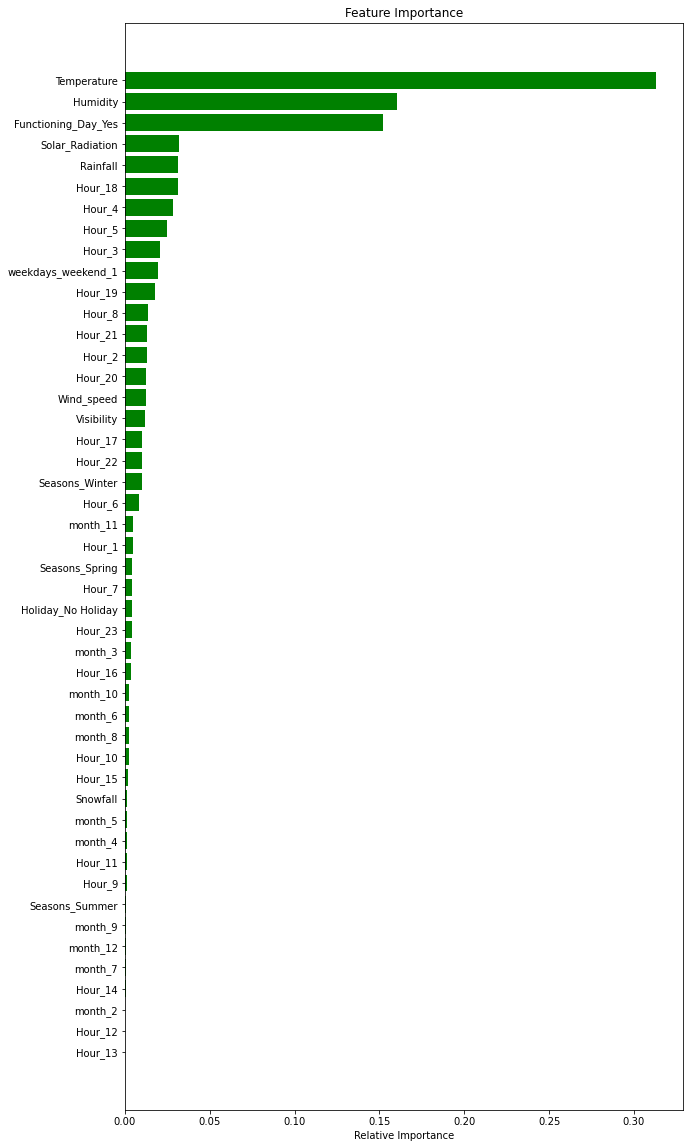

In [90]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color="green", align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

# GradientBoostingRegressor

It builds an additive model . It allows to do the optimization of arbitrary differentiable loss functions. In each stage a regression tree is fit on the negative gradient of the given loss function

In [91]:
#import the packages
from sklearn.ensemble import GradientBoostingRegressor
# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()


In [92]:
#fitting the model
gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [93]:
# Making predictions on train and test data

y_pred_train_g = gb_model.predict(X_train)
y_pred_test_g = gb_model.predict(X_test)


# Calculating for train data

In [94]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",gb_model.score(X_train,y_train))
#calculate MSE
MSE_gb= mean_squared_error(y_train, y_pred_train_g)
print("MSE :",MSE_gb)

#calculate RMSE
RMSE_gb=np.sqrt(MSE_gb)
print("RMSE :",RMSE_gb)


#calculate MAE
MAE_gb= mean_absolute_error(y_train, y_pred_train_g)
print("MAE :",MAE_gb)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_gb= r2_score(y_train, y_pred_train_g)
print("R2 :",r2_gb)
Adjusted_R2_gb = (1-(1-r2_score(y_train, y_pred_train_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


Model Score: 0.8789016499095264
MSE : 18.64801713184794
RMSE : 4.3183349953249275
MAE : 3.2690035692731247
R2 : 0.8789016499095264
Adjusted R2 : 0.8762444965695393


In [95]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Gradient boosting regression ',
       'MAE':round((MAE_gb),3),
       'MSE':round((MSE_gb),3),
       'RMSE':round((RMSE_gb),3),
       'R2_score':round((r2_gb),3),
       'Adjusted R2':round((Adjusted_R2_gb ),2),
       }
training=training.append(dict1,ignore_index=True)

# Calculating for test data

In [96]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_gb= mean_squared_error(y_test, y_pred_test_g)
print("MSE :",MSE_gb)

#calculate RMSE
RMSE_gb=np.sqrt(MSE_gb)
print("RMSE :",RMSE_gb)


#calculate MAE
MAE_gb= mean_absolute_error(y_test, y_pred_test_g)
print("MAE :",MAE_gb)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_gb= r2_score((y_test), (y_pred_test_g))
print("R2 :",r2_gb)
Adjusted_R2_gb = (1-(1-r2_score((y_test), (y_pred_test_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 21.28944184250869
RMSE : 4.6140483138463875
MAE : 3.492858786559991
R2 : 0.8652280396863458
Adjusted R2 : 0.8622708584843188


In [97]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Gradient boosting regression ',
       'MAE':round((MAE_gb),3),
       'MSE':round((MSE_gb),3),
       'RMSE':round((RMSE_gb),3),
       'R2_score':round((r2_gb),3),
       'Adjusted R2':round((Adjusted_R2_gb ),2),
       }
testing=testing.append(dict2,ignore_index=True)

In [98]:
gb_model.feature_importances_

array([3.21395315e-01, 1.28054219e-01, 5.01908892e-04, 4.41033341e-04,
       4.82210501e-02, 6.50977064e-02, 3.00825496e-05, 4.41679040e-04,
       6.20291012e-03, 1.54723207e-02, 2.77923448e-02, 2.09197623e-02,
       5.54914116e-03, 1.38849071e-03, 9.51964101e-03, 0.00000000e+00,
       2.87933226e-03, 1.37560679e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.08156531e-04, 7.57741782e-03,
       3.03117662e-02, 1.74699066e-02, 1.14240782e-02, 1.55664225e-02,
       1.20487441e-02, 2.45479420e-04, 1.42322866e-05, 0.00000000e+00,
       3.35174157e-02, 2.23294271e-03, 1.74747832e-01, 0.00000000e+00,
       1.72209214e-03, 9.33502112e-05, 2.82254756e-04, 4.18000398e-03,
       0.00000000e+00, 2.71539952e-03, 0.00000000e+00, 6.76468137e-03,
       5.12015005e-03, 2.89720073e-04, 1.79854096e-02])

In [99]:
importances = gb_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [100]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [101]:
importance_df.head(10)

,Feature,Feature Importance
0,Temperature,0.32
1,Humidity,0.13
2,Wind_speed,0.00
3,Visibility,0.00
4,Solar_Radiation,0.05
5,Rainfall,0.07
6,Snowfall,0.00
7,Hour_1,0.00
8,Hour_2,0.01
9,Hour_3,0.02


In [102]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
0,Temperature,0.32
34,Functioning_Day_Yes,0.17
1,Humidity,0.13
5,Rainfall,0.07
4,Solar_Radiation,0.05
32,Seasons_Winter,0.03
24,Hour_18,0.03
10,Hour_4,0.03
11,Hour_5,0.02
27,Hour_21,0.02


In [103]:
gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [104]:
features = X_train.columns
importances = gb_model.feature_importances_
indices = np.argsort(importances)

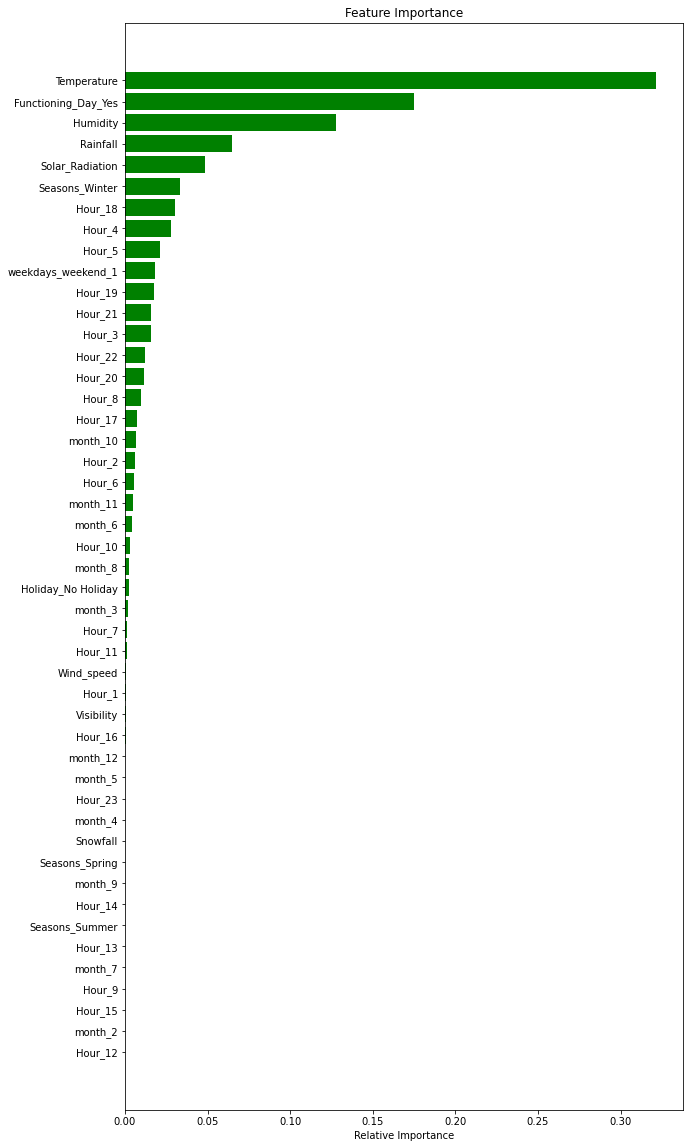

In [105]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

# Hyperparameter tuning:
Before proceding to try next models, let us try to tune some hyperparameters and see if the performance of our model improves.

Hyperparameter tuning is the process of choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a model argument whose value is set before the learning process begins. The key to machine learning algorithms is hyperparameter tuning.

# Using GridSearchCV:

GridSearchCV helps to loop through predefined hyperparameters and fit the model on the training set. So, in the end, we can select the best parameters from the listed hyperparameters.

# Gradient Boosting Regressor with GridSearchCV

# Provide the range of values for chosen hyperparameters

In [106]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [107]:
param_dict

{'n_estimators': [50, 80, 100],
 'max_depth': [4, 6, 8],
 'min_samples_split': [50, 100, 150],
 'min_samples_leaf': [40, 50]}

# Importing Gradient Boosting Regressor

In [108]:
from sklearn.model_selection import GridSearchCV
# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()

# Grid search
gb_grid = GridSearchCV(estimator=gb_model,param_grid = param_dict,cv = 5, verbose=2)


In [109]:
gb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.8s
[CV] END max_depth=4, min_sam

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [110]:
gb_grid.best_estimator_

GradientBoostingRegressor(max_depth=8, min_samples_leaf=40,
                          min_samples_split=50)

In [111]:
gb_optimal_model = gb_grid.best_estimator_

In [112]:
gb_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 100}

In [113]:
# Making predictions on train and test data

y_pred_train_g_g = gb_optimal_model.predict(X_train)
y_pred_g_g= gb_optimal_model.predict(X_test)

# Calculating the Train data

In [114]:
#import the package
from sklearn.metrics import mean_squared_error

In [115]:
#model Score
print("Model Score:",gb_optimal_model.score(X_train,y_train))

Model Score: 0.9515896672300013


In [116]:
#calculate MSE
MSE_gbh= mean_squared_error(y_train, y_pred_train_g_g)
print("MSE :",MSE_gbh)
#calculate RMSE
RMSE_gbh=np.sqrt(MSE_gbh)
print("RMSE :",RMSE_gbh)
#calculate MAE
MAE_gbh= mean_absolute_error(y_train, y_pred_train_g_g)
print("MAE :",MAE_gbh)
#import package
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_gbh= r2_score(y_train, y_pred_train_g_g)
print("R2 :",r2_gbh)
Adjusted_R2_gbh = (1-(1-r2_score(y_train, y_pred_train_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 7.454740004128373
RMSE : 2.7303369762958516
MAE : 1.8489194833919356
R2 : 0.9515896672300013
Adjusted R2 : 0.9505274423746372


In [117]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Gradient Boosting gridsearchcv ',
       'MAE':round((MAE_gbh),3),
       'MSE':round((MSE_gbh),3),
       'RMSE':round((RMSE_gbh),3),
       'R2_score':round((r2_gbh),3),
       'Adjusted R2':round((Adjusted_R2_gbh ),2)
      }
training=training.append(dict1,ignore_index=True)

# Calculating the test data

In [118]:
#import packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_gbh= mean_squared_error(y_test, y_pred_g_g)
print("MSE :",MSE_gbh)
#calculate RMSE
RMSE_gbh=np.sqrt(MSE_gbh)
print("RMSE :",RMSE_gbh)
#calculate MAE
MAE_gbh= mean_absolute_error(y_test, y_pred_g_g)
print("MAE :",MAE_gbh)
#import package
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_gbh= r2_score((y_test), (y_pred_g_g))
print("R2 :",r2_gbh)
Adjusted_R2_gbh = (1-(1-r2_score(y_test, y_pred_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_g_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 12.392760556291103
RMSE : 3.520335290322657
MAE : 2.4005915565405354
R2 : 0.921548124829924
Adjusted R2 : 0.9198267251413182


In [119]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Gradient Boosting gridsearchcv ',
       'MAE':round((MAE_gbh),3),
       'MSE':round((MSE_gbh),3),
       'RMSE':round((RMSE_gbh),3),
       'R2_score':round((r2_gbh),3),
       'Adjusted R2':round((Adjusted_R2_gbh ),2)
      }
testing=testing.append(dict2,ignore_index=True)

In [120]:
gb_optimal_model.feature_importances_

array([3.12057438e-01, 1.52960270e-01, 6.20316780e-03, 6.03743312e-03,
       3.75324776e-02, 4.41384879e-02, 1.25380735e-03, 9.51937002e-04,
       9.98653930e-03, 1.96911560e-02, 2.89529919e-02, 2.45449359e-02,
       6.18872117e-03, 3.32550727e-03, 1.20634772e-02, 4.66509851e-04,
       3.73626049e-03, 2.06003352e-03, 6.36119042e-05, 1.39325973e-04,
       9.77140091e-05, 5.27337742e-04, 1.33847427e-03, 9.51593158e-03,
       3.11372494e-02, 1.65223193e-02, 1.21776066e-02, 1.44682226e-02,
       9.91879886e-03, 2.41023598e-03, 3.67911329e-03, 1.06796008e-03,
       1.62472784e-02, 2.18064007e-03, 1.57198472e-01, 7.75938658e-05,
       1.32320249e-03, 1.09973153e-04, 1.66051097e-03, 2.73793528e-03,
       1.57593261e-03, 6.25088726e-03, 7.62045639e-05, 6.35447256e-03,
       4.56464936e-03, 1.05534757e-03, 2.33718468e-02])

In [121]:
importances = gb_optimal_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [122]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [123]:
importance_df.head(10)

,Feature,Feature Importance
0,Temperature,0.31
1,Humidity,0.15
2,Wind_speed,0.01
3,Visibility,0.01
4,Solar_Radiation,0.04
5,Rainfall,0.04
6,Snowfall,0.00
7,Hour_1,0.00
8,Hour_2,0.01
9,Hour_3,0.02


In [124]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
0,Temperature,0.31
34,Functioning_Day_Yes,0.16
1,Humidity,0.15
4,Solar_Radiation,0.04
5,Rainfall,0.04
10,Hour_4,0.03
24,Hour_18,0.03
32,Seasons_Winter,0.02
25,Hour_19,0.02
11,Hour_5,0.02


In [125]:
gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [126]:
features = X_train.columns
importances = gb_model.feature_importances_
indices = np.argsort(importances)

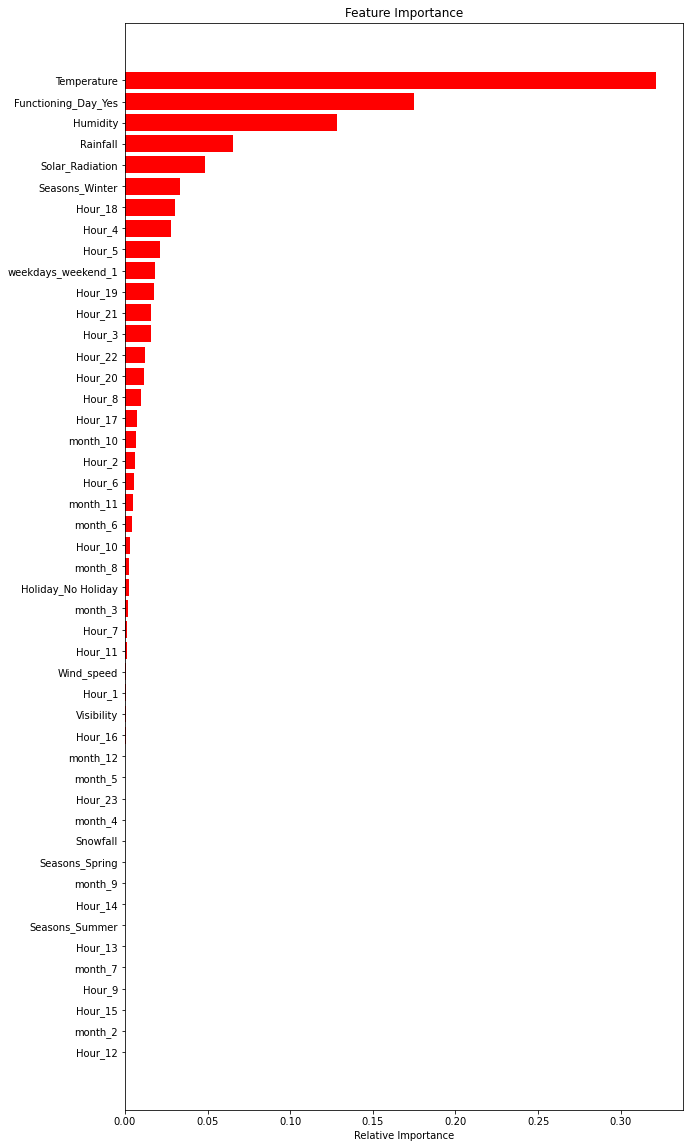

In [127]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

# Model Comparison

 During the time of our analysis, we initially did EDA on all the features of our datset. We first analysed our dependent variable, 'Rented Bike Count' and also transformed it. Next we analysed categorical variable and dropped the variable who had majority of one class, we also analysed numerical variable, found out the correlation, distribution and their relationship with the dependent variable. We also removed some numerical features who had mostly 0 values and hot encoded the categorical variables. Next we implemented 4 machine learning algorithms Linear Regression,decission tree, Random Forest . We did hyperparameter tuning to improve our model performance. The results of our evaluation are:

In [128]:
# displaying the results of evaluation metric values for all models
result=pd.concat([training,testing],keys=['Training set','Test set'])
result

Model    MAE     MSE   RMSE  \
Training set 0               Linear regression   4.474  35.078  5.923   
             1        Random forest regression   0.804   1.599  1.264   
             2    Gradient boosting regression   3.269  18.648  4.318   
             3  Gradient Boosting gridsearchcv   1.849   7.455  2.730   
Test set     0               Linear regression   4.410  33.275  5.768   
             1        Random forest regression   2.213  12.794  3.577   
             2    Gradient boosting regression   3.493  21.289  4.614   
             3  Gradient Boosting gridsearchcv   2.401  12.393  3.520   

                R2_score  Adjusted R2  
Training set 0     0.772         0.77  
             1     0.990         0.99  
             2     0.879         0.88  
             3     0.952         0.95  
Test set     0     0.789         0.78  
             1     0.919         0.92  
             2     0.865         0.86  
             3     0.922         0.92

# conclusion
• No overfitting is seen.

• Random forest Regressor and Gradient Boosting gridsearchcv gives the highest R2 score of 99% and 95% recpectively for Train Set and 92% for Test set.

• Feature Importance value for Random Forest and Gradient Boost are different.

• We can deploy this model.